# This is the data cleaning Notebok for the project

In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
df = pd.read_excel("marketing_data.xlsx")

## Data Profiling

In [3]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

## Data Preprocessing

In [4]:
# Converting year of birth into age
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']
print(df[['Age', 'Year_Birth']])
print(df['Age'].unique())

      Age  Year_Birth
0      54        1970
1      63        1961
2      66        1958
3      57        1967
4      35        1989
...   ...         ...
2235   48        1976
2236   47        1977
2237   48        1976
2238   46        1978
2239   55        1969

[2240 rows x 2 columns]
[ 54  63  66  57  35  70  77  45  65  43  55  47  64  58  48  59  68  49
  53  38  52  50  34  37  40  56  69  41  51  46  72  62  60  42  61  67
  44  79  75  76  71  78  39  32  80  73  36  74  30  31  33 131  28  29
 125  81  83  84 124]


In [5]:
# Fixing the format for Dt_customer
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='mixed')
print(df.shape)
df = df[(df['Dt_Customer'].dt.year - df['Year_Birth']) > 18]
print(df.shape)
df['Dt_Customer'] = df['Dt_Customer'].astype(str)
print(df)

(2240, 23)
(2234, 23)
         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      1826        1970  Graduation       Divorced  84835.0        0   
1         1        1961  Graduation         Single  57091.0        0   
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   
2239   4070        1969         PhD        Married  94871.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  MntSweetProducts  \
0            0  2014-06-16        0      

In [6]:
# df.sort_values(by='Income', ascending=True, inplace=True)
# sns.barplot(x='BuyingPower', y='Income', data=df)

In [7]:
# df['BuyingPower'].head()

## Filling all null income values

In [8]:
df['Income'].head()

0    84835.0
1    57091.0
2    67267.0
3    32474.0
4    21474.0
Name: Income, dtype: float64

In [9]:
# Graduation = df[df['Education'] == 'Graduation']
# Graduation.head(50)

unique_values = df['Education'].unique()
print(unique_values)

['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']


In [10]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [11]:
df['Marital_Status'] = df['Marital_Status'].replace(['YOLO', 'Alone'], 'Single')
df['Marital_Status'] = df['Marital_Status'].replace(['Absurd'], 'Married')

In [12]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

In [13]:
df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [14]:
df['Education'] = df['Education'].replace(['2n Cycle'], 'TwoN_Cycle')

In [15]:
Graduation_mean = df[df['Education'] == 'Graduation']
Graduation_mean = Graduation_mean['Income'].mean()
print(Graduation_mean)

52656.84290843806


In [16]:
PhD_mean = df[df['Education'] == 'PhD']
PhD_mean = PhD_mean['Income'].mean()
print(PhD_mean)

56145.31392931393


In [17]:
TwoN_Cycle_mean = df[df['Education'] == 'TwoN_Cycle']
TwoN_Cycle_mean = TwoN_Cycle_mean['Income'].mean()
print(TwoN_Cycle_mean)

47488.649746192896


In [18]:
Master_mean = df[df['Education'] == 'Master']
Master_mean = Master_mean['Income'].mean()
print(Master_mean)

52917.53424657534


In [19]:
Basic_mean = df[df['Education'] == 'Basic']
Basic_mean = Basic_mean['Income'].mean()
print(Basic_mean)

20417.30188679245


In [20]:
# function for totaling the number of family members
def total_family_size(maritalStatus, familySize):
    if maritalStatus in ('Together', 'Married'):
        return familySize + 2
    else:
        return familySize + 1

In [21]:
df['Family_Size'] = df['Kidhome'] + df['Teenhome']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Family_Size
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,218,1,4,4,6,1,1,0,54,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,37,1,7,3,7,5,1,0,63,0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,30,1,3,2,5,2,0,0,66,1
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,0,1,1,0,2,7,0,0,57,2
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,34,2,3,1,2,7,1,0,35,1


In [22]:
df['Family_Size'] = df.apply(lambda row: total_family_size(row['Marital_Status'], row['Family_Size']), axis=1)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Family_Size
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,218,1,4,4,6,1,1,0,54,1
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,37,1,7,3,7,5,1,0,63,1
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,30,1,3,2,5,2,0,0,66,3
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,0,1,1,0,2,7,0,0,57,4
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,34,2,3,1,2,7,1,0,35,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-07-03,99,372,...,78,2,5,2,11,4,0,0,48,2
2236,5263,1977,TwoN_Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,16,1,1,0,3,8,0,0,47,3
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-03-12,99,185,...,14,2,6,1,5,8,0,0,48,2
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,63,1,5,4,10,3,0,0,46,2


In [23]:
null_income = df[df['Income'].isnull()]
# null_income = null_income.isnull().sum()
null_income['Income'][null_income['Education'] == 'Graduation'] = Graduation_mean
null_income['Income'][null_income['Education'] == 'PhD'] = PhD_mean
null_income['Income'][null_income['Education'] == 'TwoN_Cycle'] = TwoN_Cycle_mean
null_income['Income'][null_income['Education'] == 'Master'] = Master_mean
null_income['Income'][null_income['Education'] == 'Basic'] = Basic_mean
print(null_income)

         ID  Year_Birth   Education Marital_Status        Income  Kidhome  \
134    8996        1957         PhD        Married  56145.313929        2   
262    1994        1983  Graduation        Married  52656.842908        1   
394    3769        1972         PhD       Together  56145.313929        1   
449    5255        1986  Graduation         Single  52656.842908        1   
525    8268        1961         PhD        Married  56145.313929        0   
590   10629        1973  TwoN_Cycle        Married  47488.649746        1   
899   10475        1970      Master       Together  52917.534247        0   
997    9235        1957  Graduation         Single  52656.842908        1   
1096   4345        1964  TwoN_Cycle         Single  47488.649746        1   
1185   7187        1969      Master       Together  52917.534247        1   
1213   8720        1978  TwoN_Cycle       Together  47488.649746        0   
1312   8557        1982  Graduation         Single  52656.842908        1   

C:\Users\Lex Zedrick Lorenzo\AppData\Local\Temp\ipykernel_15612\697268795.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_income['Income'][null_income['Education'] == 'Graduation'] = Graduation_mean
C:\Users\Lex Zedrick Lorenzo\AppData\Local\Temp\ipykernel_15612\697268795.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_income['Income'][null_income['Education'] == 'PhD'] = PhD_mean
C:\Users\Lex Zedrick Lorenzo\AppData\Local\Temp\ipykernel_15612\697268795.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

In [24]:
df['Income'][df['Income'].isnull()] = null_income['Income']
df.head(50)

C:\Users\Lex Zedrick Lorenzo\AppData\Local\Temp\ipykernel_15612\140808848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income'][df['Income'].isnull()] = null_income['Income']


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Family_Size
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,218,1,4,4,6,1,1,0,54,1
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,37,1,7,3,7,5,1,0,63,1
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,30,1,3,2,5,2,0,0,66,3
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,0,1,1,0,2,7,0,0,57,4
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,34,2,3,1,2,7,1,0,35,2
5,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,...,43,1,4,7,5,2,1,0,66,1
6,4073,1954,TwoN_Cycle,Married,63564.0,0,0,2014-01-29,0,769,...,65,1,10,10,7,6,1,0,70,2
7,1991,1967,Graduation,Together,44931.0,0,1,2014-01-18,0,78,...,7,1,2,1,3,5,0,0,57,3
8,4047,1954,PhD,Married,65324.0,0,1,2014-11-01,0,384,...,5,3,6,2,9,4,0,0,70,3
9,9477,1954,PhD,Married,65324.0,0,1,2014-11-01,0,384,...,5,3,6,2,9,4,0,0,70,3


In [25]:
# Adding a column for the buying power of each customer
df['Total_Spent'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])/6
df['BuyingPower'] = df['Total_Spent'] / df['Income'] 

In [26]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
Age                    0
Family_Size            0
Total_Spent            0
BuyingPower            0
dtype: int64

In [27]:
# One Hot Encoding the non quantifiable columns
# def one_hot_encode(data, column, suffix=''):
#     encoded = pd.get_dummies(data[column], drop_first= True)
#     data = data.drop(column, axis = 1)
#     data = data.join(encoded, lsuffix='_data', rsuffix='_encoded')
#     # data = data.join(encoded)
#     return data

# df = one_hot_encode(df, 'Marital_Status')
# df = one_hot_encode(df, 'Education')

# df

## Saving the cleaned data

In [28]:
df.to_excel('Cleaned_Data.xlsx')

In [29]:
df.count()

ID                     2234
Year_Birth             2234
Education              2234
Marital_Status         2234
Income                 2234
Kidhome                2234
Teenhome               2234
Dt_Customer            2234
Recency                2234
MntWines               2234
MntFruits              2234
MntMeatProducts        2234
MntFishProducts        2234
MntSweetProducts       2234
MntGoldProds           2234
NumDealsPurchases      2234
NumWebPurchases        2234
NumCatalogPurchases    2234
NumStorePurchases      2234
NumWebVisitsMonth      2234
Response               2234
Complain               2234
Age                    2234
Family_Size            2234
Total_Spent            2234
BuyingPower            2234
dtype: int64

In [30]:
df = df[df['Income'] < 200000]
df.count()


ID                     2233
Year_Birth             2233
Education              2233
Marital_Status         2233
Income                 2233
Kidhome                2233
Teenhome               2233
Dt_Customer            2233
Recency                2233
MntWines               2233
MntFruits              2233
MntMeatProducts        2233
MntFishProducts        2233
MntSweetProducts       2233
MntGoldProds           2233
NumDealsPurchases      2233
NumWebPurchases        2233
NumCatalogPurchases    2233
NumStorePurchases      2233
NumWebVisitsMonth      2233
Response               2233
Complain               2233
Age                    2233
Family_Size            2233
Total_Spent            2233
BuyingPower            2233
dtype: int64

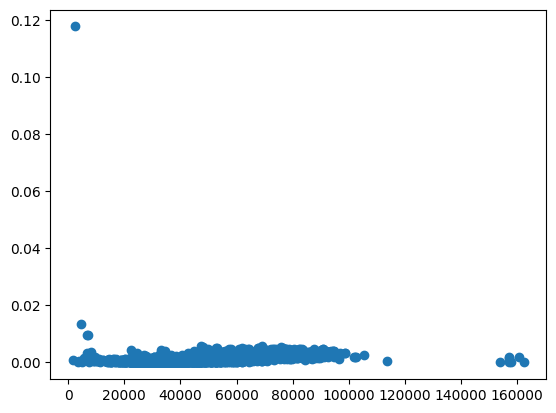

In [31]:
plt.scatter(df['Income'], df['BuyingPower'])

In [32]:
df['TotalPurchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

C:\Users\Lex Zedrick Lorenzo\AppData\Local\Temp\ipykernel_15612\2526275051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPurchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']


In [33]:
df['Interest'] = df['NumWebVisitsMonth'] + df['Recency'] 

C:\Users\Lex Zedrick Lorenzo\AppData\Local\Temp\ipykernel_15612\1942452635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Interest'] = df['NumWebVisitsMonth'] + df['Recency']


In [34]:
df = df[df['BuyingPower']< 0.05]

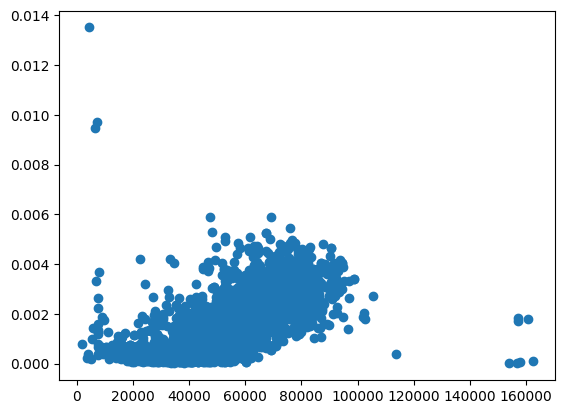

In [35]:
plt.scatter(df['Income'], df['BuyingPower'])    

In [36]:
df.to_excel('Threshold_Data.xlsx')